<a href="https://colab.research.google.com/github/wertonr/Projetos/blob/main/Automacao_despesas_previdenciarias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Relatorio mensal de despesas previdenciarias 

## Introdução 

Todo mês é preciso fazer o relatório de despesas previdenciárias, por isso é preciso preencher a seguinte tabela:

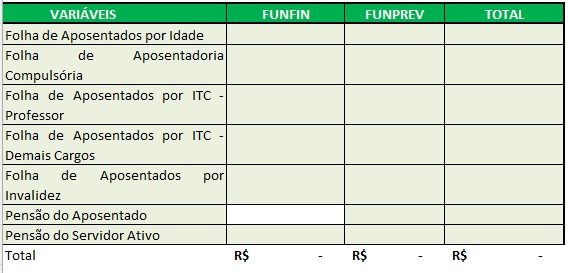

E a fonte de dados para extrair essas informações é uma planilha com mais de 7000 observações, similar ao exemplo abaixo:

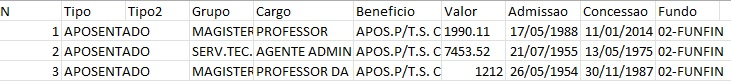
*Dados ficticios.


Nas primeiras vezes que fiz o relatório, utilizei filtros e tabelas dinamicas no Excel. Todavia, como era um trabalho mensal e repetitivo, optei por automatizar essa extração da informação usando o python. 


## Desenvolvimento 



Os dados e resultados aqui apresentados são ficticios, uma vez que fiz alterações no banco original para evitar qualquer vazamento de informação sensível.  

In [43]:
#Leitura do Banco de dados
import pandas as pd
df = pd.read_csv('dezembro.csv', sep=';' ,encoding ='ISO-8859-1')
df.head(3) 


,ï»¿N,Tipo,Tipo2,Grupo,Cargo,Beneficio,Valor,Admissao,Concessao,Fundo
0,1,APOSENTADO,NaN,MAGISTERIO - MAG,PROFESSOR,APOS.P/T.S. C/RESC. CONTRATUAL,1990.11,17/05/1988,11/01/2014,02-FUNFIN
1,2,APOSENTADO,NaN,SERV.TEC.E APOIO ADMINIST. - STA,AGENTE ADMINISTRATIVO,APOS.P/T.S. C/RESC. CONTRATUAL,2901.02,21/07/1955,13/05/1975,02-FUNFIN
2,3,APOSENTADO,NaN,MAGISTERIO - MAG,PROFESSOR DA EDUCACAO BASICA I,APOS.P/T.S. C/RESC. CONTRATUAL,3026.61,26/05/1954,30/11/1987,01-FUNPREV


In [44]:
#Informação sobre as variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669 entries, 0 to 7668
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ï»¿N       7669 non-null   int64  
 1   Tipo       7669 non-null   object 
 2   Tipo2      1484 non-null   object 
 3   Grupo      6136 non-null   object 
 4   Cargo      6136 non-null   object 
 5   Beneficio  7563 non-null   object 
 6   Valor      7669 non-null   float64
 7   Admissao   7544 non-null   object 
 8   Concessao  7669 non-null   object 
 9   Fundo      7638 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 599.3+ KB


In [46]:
# Observando quais variaveis únicas na coluna tipo
df['Tipo'].unique()

array(['APOSENTADO', 'ATIVO', 'PENSIONISTA'], dtype=object)

In [47]:
#Verificando quantidade de segurados ativos, aposentados e pensionistas

ativos = df.query('Tipo == "ATIVO"')
print(f"Total de {len(ativos)} ativos") 

aposentados = df.query('Tipo == "APOSENTADO"')
print(f"Total de {len(aposentados)} aposentados") 

pensionistas = df.query('Tipo == "PENSIONISTA"')
print(f"Total de {len(pensionistas)} pensionistas")
       

Total de 106 ativos
Total de 6079 aposentados
Total de 1484 pensionistas


In [48]:
# Os tipos de fundo existentes na planilha
df['Fundo'].unique()

array(['02-FUNFIN', '01-FUNPREV', '03-TESOURO', nan], dtype=object)

In [49]:
# Quantidade de aposentados e pensionistas por fundo.
aposentados_prev = aposentados.query('Fundo == "01-FUNPREV"')
print("Aposentados FUNPREV: ", len(aposentados_prev))

aposentados_fin = aposentados.query('Fundo == "02-FUNFIN"')
print("Aposentados FUNFIN: ", len(aposentados_fin))

pensionistas_prev = pensionistas.query('Fundo == "01-FUNPREV"')
print("Pensionistas FUNPREV: ", len(pensionistas_prev))

pensionistas_fin = pensionistas.query('Fundo == "02-FUNFIN"')
print("Pensionistas FUNFIN: ", len(pensionistas_fin))

Aposentados FUNPREV:  37
Aposentados FUNFIN:  5981
Pensionistas FUNPREV:  20
Pensionistas FUNFIN:  1409


In [50]:
# Para ter uma visão geral dos gastos com aposentadorias e pensões

print("Valor Total Aposentadoria FUNPREV: ", aposentados_prev['Valor'].sum())
print("Valor Total Aposentadoria FUNFIN: ",aposentados_fin['Valor'].sum())

print("Valor Total Pensões FUNPREV: ",pensionistas_prev['Valor'].sum())
print("Valor Total Pensões FUNFIN: ", pensionistas_fin['Valor'].sum())

total_prev = aposentados_prev['Valor'].sum() + pensionistas_prev['Valor'].sum()
print("Valor Total FUNPREV: ", total_prev)
total_fin = aposentados_fin['Valor'].sum() + pensionistas_fin['Valor'].sum()
print("Valor Total FUNFIN: ", total_fin)


Valor Total Aposentadoria FUNPREV:  114588.37
Valor Total Aposentadoria FUNFIN:  19811400.287
Valor Total Pensões FUNPREV:  41765.98000000001
Valor Total Pensões FUNFIN:  3751766.1399999997
Valor Total FUNPREV:  156354.35
Valor Total FUNFIN:  23563166.427


In [51]:
df['Tipo2'].unique()

array([nan, 'APOSENTADO', 'ATIVO'], dtype=object)

In [52]:
# Calculando os valores de pensões do funprev
penprev_ativos = pensionistas_prev.query('Tipo2 == "ATIVO"')
penprev_apo = pensionistas_prev.query('Tipo2 == "APOSENTADO"')

print("Valor Pensão Ativo FUNPREV: ", penprev_ativos['Valor'].sum())
print("Valor Pensão Inativo FUNPREV: ", penprev_apo['Valor'].sum())

                                     

Valor Pensão Ativo FUNPREV:  31894.050000000003
Valor Pensão Inativo FUNPREV:  9871.93


In [53]:
# Calculando os valores de pensões do funfin
penfin_ativos = pensionistas_fin.query('Tipo2 == "ATIVO"')
penfin_apo = pensionistas_fin.query('Tipo2 == "APOSENTADO"')

print("Valor Pensão Ativo FUNFIN: ", penfin_ativos['Valor'].sum())
print("Valor Pensão Inativo FUNFIN: ", penfin_apo['Valor'].sum())


Valor Pensão Ativo FUNFIN:  1540821.96
Valor Pensão Inativo FUNFIN:  2210944.1799999997


In [54]:
# Verificando os tipos de benefício previdenciário
df['Beneficio'].unique()

array(['APOS.P/T.S. C/RESC. CONTRATUAL', 'APOS.P/INVALIDEZ-DOENCA',
       'APOSENTADORIAP/INVALIDEZ', 'APOSENTADORIA COMPULSORIA',
       'APOSENTADORIA POR IDADE', 'APOSOSENTADORIA PELA MEDIA',
       'APOS. P/T.S.S/RESC. CONTRATUAL', nan, 'Pensionista'], dtype=object)

In [55]:

aid_prev = aposentados_prev.query('Beneficio == "APOSENTADORIA POR IDADE"')               
aid_fin = aposentados_fin.query('Beneficio == "APOSENTADORIA POR IDADE"')               

print("Valor da aposentadoria por idade FUNPREV: ", aid_prev['Valor'].sum())
print("Valor da aposentadoria por idade FUNFIN: ", aid_fin['Valor'].sum())

Valor da aposentadoria por idade FUNPREV:  4534.73
Valor da aposentadoria por idade FUNFIN:  984024.14


In [56]:
ac_prev = aposentados_prev.query('Beneficio == "APOSENTADORIA COMPULSORIA"')               
ac_fin = aposentados_fin.query('Beneficio == "APOSENTADORIA COMPULSORIA"')               

print("Valor da aposentadoria compulsoria FUNPREV: ", ac_prev['Valor'].sum())
print("Valor da aposentadoria compulsoria FUNFIN: ", ac_fin['Valor'].sum())

Valor da aposentadoria compulsoria FUNPREV:  7830.049999999999
Valor da aposentadoria compulsoria FUNFIN:  479246.1


In [57]:
ain_prev = aposentados_prev.query('Beneficio == "APOS.P/INVALIDEZ-DOENCA" | Beneficio == "APOSENTADORIAP/INVALIDEZ"')               
ain_fin = aposentados_fin.query('Beneficio == "APOS.P/INVALIDEZ-DOENCA" | Beneficio == "APOSENTADORIAP/INVALIDEZ"')               

print("Valor da aposentadoria invalidez FUNPREV: ", ain_prev['Valor'].sum())
print("Valor da aposentadoria invalidez FUNFIN: ", ain_fin['Valor'].sum())

Valor da aposentadoria invalidez FUNPREV:  82082.38
Valor da aposentadoria invalidez FUNFIN:  1752480.317


In [58]:
atc_prev = aposentados_prev.query('Beneficio == "APOS.P/T.S. C/RESC. CONTRATUAL" | Beneficio == "APOS. P/T.S.S/RESC. CONTRATUAL" | Beneficio == "APOSOSENTADORIA PELA MEDIA"')

print("Valor da aposentadoria por TC FUNPREV: ", atc_prev['Valor'].sum())


atc_fin = aposentados_fin.query('Beneficio == "APOS.P/T.S. C/RESC. CONTRATUAL" | Beneficio == "APOS. P/T.S.S/RESC. CONTRATUAL" | Beneficio == "APOSOSENTADORIA PELA MEDIA"')

print("Valor da aposentadoria por TC FUNFIN: ", atc_fin['Valor'].sum())

Valor da aposentadoria por TC FUNPREV:  20141.21
Valor da aposentadoria por TC FUNFIN:  16595649.73


In [59]:
atc_prev_prof = atc_prev.query('Cargo == "PROFESSOR DA EDUCACAO BASICA II" | Cargo == "PROFESSOR DA EDUCACAO BASICA I" | Cargo == "PROFESSOR" | Cargo == "PROFESSOR - LICENCIATURA CURTA" | Cargo == "PROFESSOR DE NIVEL MEDIO" | Cargo == "PROFESSOR DE NIVEL SUPERIOR" | Cargo == "PROFESSOR LICENCIATURA CURTA" | Cargo == "REGENTE DE ENSINO"')

print("Valor da aposentadoria por TC Professor FUNPREV: ", atc_prev_prof['Valor'].sum())

atc_fin_prof = atc_fin.query('Cargo == "PROFESSOR DA EDUCACAO BASICA II" | Cargo == "PROFESSOR DA EDUCACAO BASICA I" | Cargo == "PROFESSOR" | Cargo == "PROFESSOR - LICENCIATURA CURTA" | Cargo == "PROFESSOR DE NIVEL MEDIO" | Cargo == "PROFESSOR DE NIVEL SUPERIOR" | Cargo == "PROFESSOR LICENCIATURA CURTA" | Cargo == "REGENTE DE ENSINO"')

print("Valor da aposentadoria por TC Professor FUNFIN: ", atc_fin_prof['Valor'].sum())

atc_prev_outros = atc_prev['Valor'].sum() - atc_prev_prof['Valor'].sum()
print("Valor da aposentadoria por TC outros FUNPREV: ", atc_prev_outros)

atc_fin_outros = atc_fin['Valor'].sum() - atc_fin_prof['Valor'].sum()
print("Valor da aposentadoria por TC outros FUNFIN: ", atc_fin_outros)

Valor da aposentadoria por TC Professor FUNPREV:  11287.42
Valor da aposentadoria por TC Professor FUNFIN:  8032282.72
Valor da aposentadoria por TC outros FUNPREV:  8853.789999999999
Valor da aposentadoria por TC outros FUNFIN:  8563367.010000002


## Resultado 

In [60]:
variaveis = ['Folha de Aposentados por Idade', 'Folha de Aposentadoria Compulsória', 'Folha de Aposentados por ITC - Professor', 'Folha de Aposentados por ITC - Demais Cargos', 'Folha de Aposentados por Invalidez', 'Pensão do Aposentado', 'Pensão do Servidor Ativo', 'TOTAL']

funfin = [aid_fin['Valor'].sum(), ac_fin['Valor'].sum(), atc_fin_prof['Valor'].sum(), atc_fin_outros, ain_fin['Valor'].sum(), penfin_apo['Valor'].sum(), penfin_ativos['Valor'].sum(), total_fin]

funprev = [aid_prev['Valor'].sum(), ac_prev['Valor'].sum(), atc_prev_prof['Valor'].sum(), atc_prev_outros, ain_prev['Valor'].sum(), penprev_apo['Valor'].sum(), penprev_ativos['Valor'].sum(), total_prev]

total = map(lambda n1, n2: n1+n2, funfin, funprev)

data = {
    "FUNFIN": funfin,
    "FUNPREV": funprev,
    "TOTAL": total
}

# create dataframe
pd.set_option("display.float_format", lambda x: '%.2f' % x) #Deixar o float mais legivel e com duas casas decimais
df = pd.DataFrame(data, index=variaveis)
df
#df.style

,FUNFIN,FUNPREV,TOTAL
Folha de Aposentados por Idade,984024.14,4534.73,988558.87
Folha de Aposentadoria Compulsória,479246.10,7830.05,487076.15
Folha de Aposentados por ITC - Professor,8032282.72,11287.42,8043570.14
Folha de Aposentados por ITC - Demais Cargos,8563367.01,8853.79,8572220.80
Folha de Aposentados por Invalidez,1752480.32,82082.38,1834562.70
Pensão do Aposentado,2210944.18,9871.93,2220816.11
Pensão do Servidor Ativo,1540821.96,31894.05,1572716.01
TOTAL,23563166.43,156354.35,23719520.78
